In [9]:
import mlrose
import random
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from mlrose.fitness import TravellingSales

def randomized_hill_climb(problem, max_attempts, max_iters, restarts=0):
    start = timer()
    state, fitness, curve = mlrose.random_hill_climb(problem, max_attempts=max_attempts, max_iters=max_iters,
                                                     restarts= restarts, curve=True, random_state=1)
    end = timer()
    time = end - start
    return state, fitness, curve, time

def simulated_annealing(problem, max_attempts, max_iters, schedule=mlrose.GeomDecay()):
    start = timer()
    state, fitness, curve = mlrose.simulated_annealing(problem, max_attempts=max_attempts, max_iters=max_iters,
                                                schedule=schedule, curve=True, random_state=1)
    end = timer()
    time = end - start
    return state, fitness, curve, time

def genetic(problem, max_attempts, max_iters, pop_size=200, mutation_prob=0.2):
    start = timer()
    state, fitness, curve = mlrose.genetic_alg(problem, max_attempts=max_attempts, max_iters=max_iters,
                                        pop_size=pop_size, mutation_prob=mutation_prob, curve=True, random_state=1)
    end = timer()
    time = end - start
    return state, fitness, curve, time

def mimic(problem, max_attempts, max_iters, pop_size=200, keep_pct=0.2):
    start = timer()
    state, fitness, curve = mlrose.mimic(problem, max_attempts=max_attempts, max_iters=max_iters,
                                  pop_size=pop_size, keep_pct=keep_pct, curve=True, random_state=1)
    end = timer()
    time = end - start
    return state, fitness, curve, time

# Define alternative Travelling salesman fitness function for maximization problem
class TravellingSalesMax(TravellingSales):
    def evaluate(self, state):
        result = super().evaluate(state)
        return -1 * result + 5000
    
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
    # Initialize counter
    fitness_cnt = 0
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):           
                # If no attacks, then increment counter
                fitness_cnt += 1
    return fitness_cnt

def plot_graph(fitness_scores, title):
    plt.switch_backend('Agg')
    %matplotlib inline
    plt.title(title)
    plt.grid()
    for k in fitness_scores.keys():
        plt.plot(fitness_scores[k], label=k)
    plt.legend(loc='lower right')
    plt.xlabel('# of Interations')
    plt.ylabel('Fitness value')
    plt.show()
    plt.clf()
    
def plot_bar(time_scores, algorithms, title):
    y_pos = np.arange(len(algorithms))
    plt.bar(y_pos, time_scores, align='center', alpha=0.5)
    plt.xticks(y_pos, algorithms)
    plt.ylabel('Time in Seconds')
    plt.title(title)
    plt.show()
    plt.clf()

## Travelling saleperson problem

In [10]:
max_attempts_list = [10, 50, 100]
max_iters = 1500
problem_size = 50
results = {10: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           50: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           100: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]]}
algorithms = ('RHC', 'SA', 'Genetic', 'MIMIC')

coords_list =[(random.randrange(0, problem_size), random.randrange(0, problem_size)) for i in range(problem_size)]
salesman_fitness = TravellingSalesMax(coords = coords_list)
salesman_problem = mlrose.TSPOpt(length = problem_size, fitness_fn = salesman_fitness, maximize=True)

for max_attempts in max_attempts_list:
    best_state, best_fitness, fitness_curve, time = randomized_hill_climb(salesman_problem, max_attempts, max_iters)
    results[max_attempts][0]['rhc'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = simulated_annealing(salesman_problem, max_attempts, max_iters)
    results[max_attempts][0]['sa'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = genetic(salesman_problem, max_attempts, max_iters)
    results[max_attempts][0]['ga'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = mimic(salesman_problem, max_attempts, max_iters)
    results[max_attempts][0]['mimic'] = fitness_curve
    results[max_attempts][1].append(time)

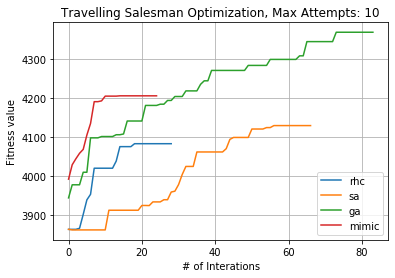

[0.0051185849999910715, 0.01168889600012335, 4.0500238380000155, 32.73612089299991]


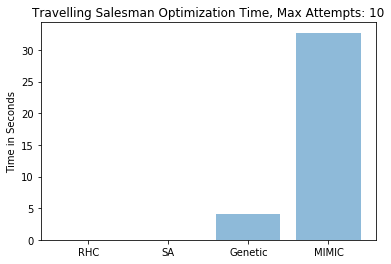

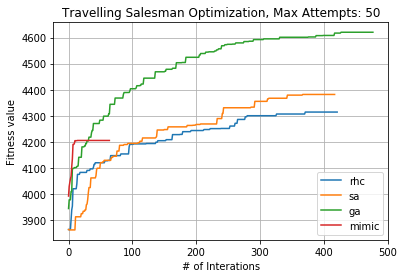

[0.05668587800005298, 0.06181500900015635, 23.56289145100004, 85.63292409700011]


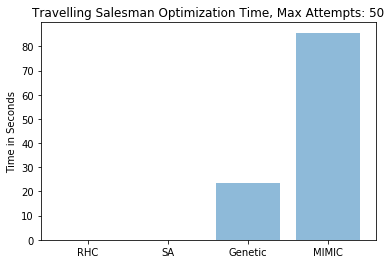

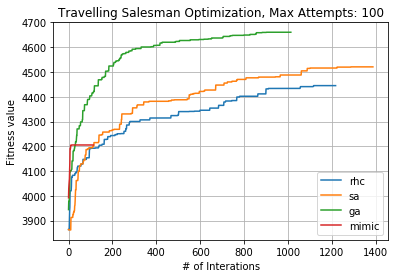

[0.16777825300005134, 0.20090273499999967, 49.06623483999988, 150.63175014199987]


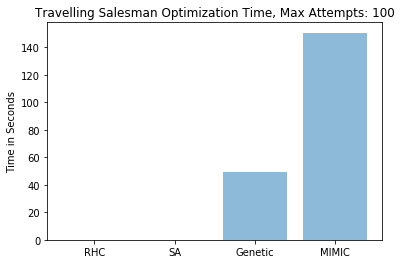

<Figure size 432x288 with 0 Axes>

In [11]:
# Fill the empty values
#for k, v in fitness_scores.items():
#    values = [v[-1]] * (max_iters - (len(v)))
#    fitness_scores[k] = np.append(v, values)
for k, v in results.items():
    plot_graph(v[0],"Travelling Salesman Optimization, Max Attempts: {}".format(k))
    print(v[1])
    plot_bar(v[1], algorithms, "Travelling Salesman Optimization Time, Max Attempts: {}".format(k))

## N-Queens optimization problem

In [12]:
max_attempts_list = [10, 50, 100]
max_iters = 1500
problem_size = 50
results = {10: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           50: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           100: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]]}
algorithms = ('RHC', 'SA', 'Genetic', 'MIMIC')

#queens_fitness = mlrose.Queens()
queens_fitness = mlrose.CustomFitness(queens_max)
queens_problem = mlrose.DiscreteOpt(length = problem_size, fitness_fn = queens_fitness, maximize = True, 
                                    max_val = problem_size)

for max_attempts in max_attempts_list:
    best_state, best_fitness, fitness_curve, time = randomized_hill_climb(queens_problem, max_attempts, max_iters)
    results[max_attempts][0]['rhc'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = simulated_annealing(queens_problem, max_attempts, max_iters)
    results[max_attempts][0]['sa'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = genetic(queens_problem, max_attempts, max_iters)
    results[max_attempts][0]['ga'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = mimic(queens_problem, max_attempts, max_iters)
    results[max_attempts][0]['mimic'] = fitness_curve
    results[max_attempts][1].append(time)

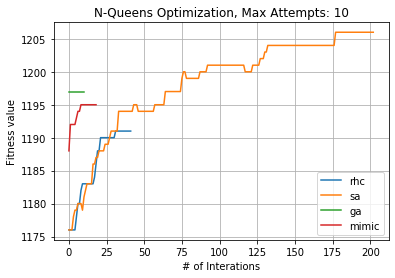

[0.07711795100021845, 0.4225707870000406, 3.68657849300007, 23.684674567000002]


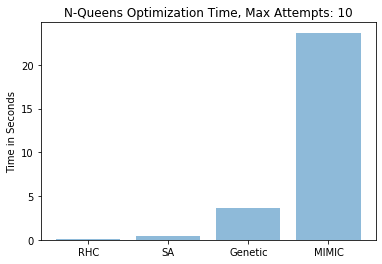

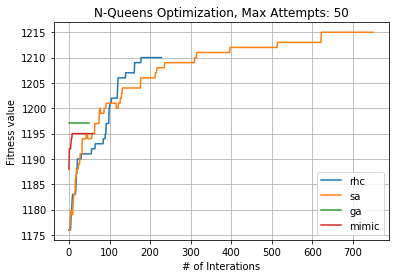

[0.3817712489999394, 1.363247377999869, 16.004924802999994, 72.5477573889998]


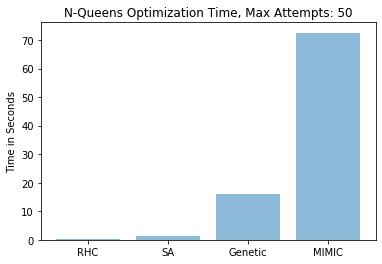

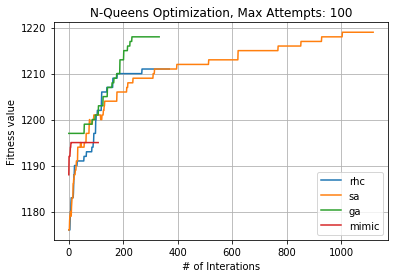

[0.5675834880003094, 1.8559859789997972, 100.53052134000018, 132.91399434200002]


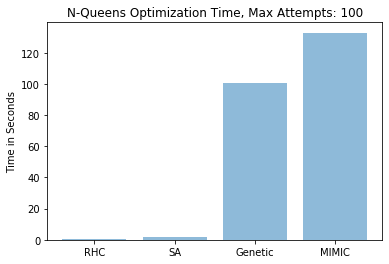

<Figure size 432x288 with 0 Axes>

In [13]:
# Fill the empty values
#for k, v in fitness_scores.items():
#    values = [v[-1]] * (max_iters - (len(v)))
#    fitness_scores[k] = np.append(v, values)
for k, v in results.items():
    plot_graph(v[0],"N-Queens Optimization, Max Attempts: {}".format(k))
    print(v[1])
    plot_bar(v[1], algorithms, "N-Queens Optimization Time, Max Attempts: {}".format(k))

## Continuous peaks problem

In [14]:
max_attempts_list = [10, 50, 100]
max_iters = 1500
problem_size = 50
results = {10: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           50: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           100: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]]}
algorithms = ('RHC', 'SA', 'Genetic', 'MIMIC')

continuous_fitness = mlrose.ContinuousPeaks(t_pct=0.15)
continuous_problem = mlrose.DiscreteOpt(length = problem_size, fitness_fn = continuous_fitness, maximize = True)

for max_attempts in max_attempts_list:
    best_state, best_fitness, fitness_curve, time = randomized_hill_climb(continuous_problem, max_attempts, max_iters)
    results[max_attempts][0]['rhc'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = simulated_annealing(continuous_problem, max_attempts, max_iters)
    results[max_attempts][0]['sa'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = genetic(continuous_problem, max_attempts, max_iters)
    results[max_attempts][0]['ga'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = mimic(continuous_problem, max_attempts, max_iters)
    results[max_attempts][0]['mimic'] = fitness_curve
    results[max_attempts][1].append(time)

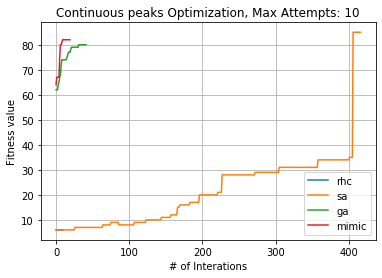

[0.0006456959999923129, 0.030961115000081918, 0.8588855110001532, 15.91067558299983]


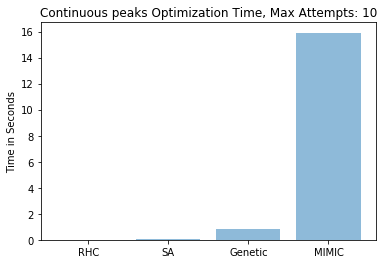

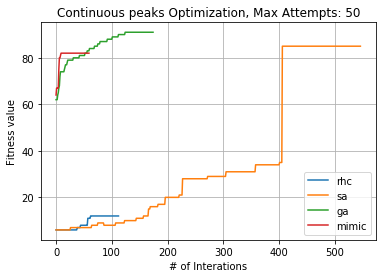

[0.0049726439997357375, 0.034653320999950665, 3.4091357649999736, 48.44403968000006]


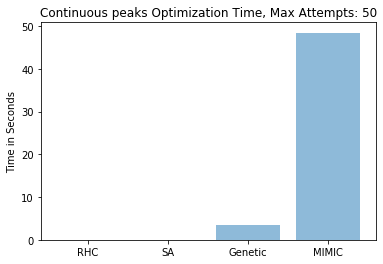

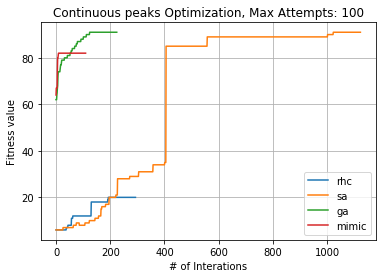

[0.012962245999915467, 0.06360620499981451, 4.485145480000028, 88.76222632999998]


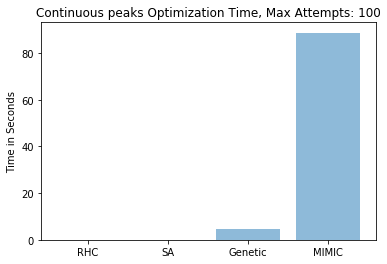

<Figure size 432x288 with 0 Axes>

In [15]:
# Fill the empty values
#for k, v in fitness_scores.items():
#    values = [v[-1]] * (max_iters - (len(v)))
#    fitness_scores[k] = np.append(v, values)
for k, v in results.items():
    plot_graph(v[0],"Continuous peaks Optimization, Max Attempts: {}".format(k))
    print(v[1])
    plot_bar(v[1], algorithms, "Continuous peaks Optimization Time, Max Attempts: {}".format(k))

## Knapsack optimization problem

In [16]:
max_attempts_list = [10, 50, 100]
max_iters = 1500
problem_size = 50
results = {10: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           50: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           100: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]]}
algorithms = ('RHC', 'SA', 'Genetic', 'MIMIC')

weights = list(np.random.randint(1, high=26, size=problem_size))
values = list(np.random.randint(1, high=10, size=problem_size))
knapsack_fitness = mlrose.Knapsack(weights, values, max_weight_pct=0.35)
knapsack_problem = mlrose.DiscreteOpt(length = problem_size, fitness_fn = knapsack_fitness, maximize = True)

for max_attempts in max_attempts_list:
    best_state, best_fitness, fitness_curve, time = randomized_hill_climb(knapsack_problem, max_attempts, max_iters)
    results[max_attempts][0]['rhc'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = simulated_annealing(knapsack_problem, max_attempts, max_iters)
    results[max_attempts][0]['sa'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = genetic(knapsack_problem, max_attempts, max_iters)
    results[max_attempts][0]['ga'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = mimic(knapsack_problem, max_attempts, max_iters)
    results[max_attempts][0]['mimic'] = fitness_curve
    results[max_attempts][1].append(time)

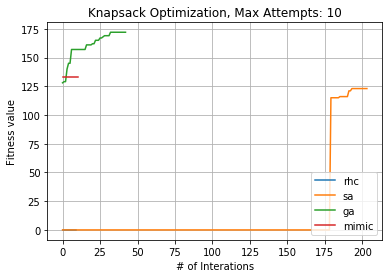

[0.0005418589998953394, 0.01417716100013422, 0.8405957999998463, 8.999911430000338]


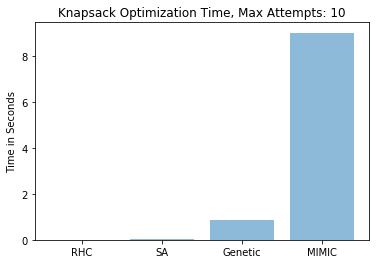

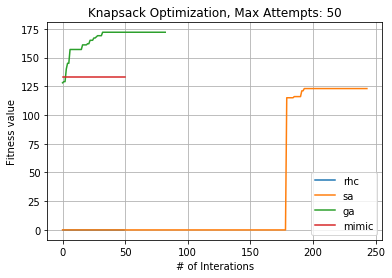

[0.001957120000042778, 0.015362140999968688, 1.5674960219998866, 41.19204478199981]


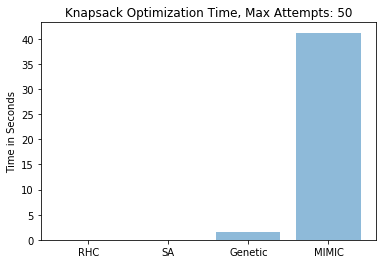

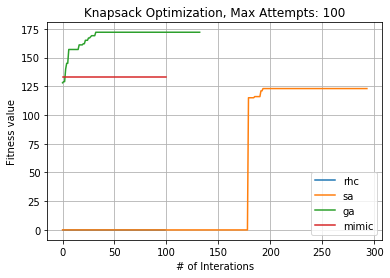

[0.00366983000003529, 0.01653264800006582, 2.4041508109999086, 80.10641685700011]


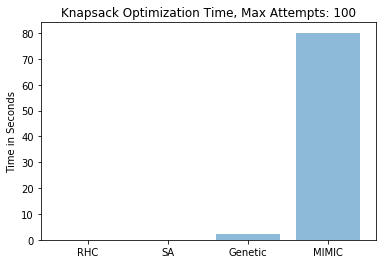

<Figure size 432x288 with 0 Axes>

In [17]:
# Fill the empty values
#for k, v in fitness_scores.items():
#    values = [v[-1]] * (max_iters - (len(v)))
#    fitness_scores[k] = np.append(v, values)
for k, v in results.items():
    plot_graph(v[0],"Knapsack Optimization, Max Attempts: {}".format(k))
    print(v[1])
    plot_bar(v[1], algorithms, "Knapsack Optimization Time, Max Attempts: {}".format(k))

## Four peaks problem

In [18]:
max_attempts_list = [10, 50, 100]
max_iters = 1500
problem_size = 50
results = {10: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           50: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           100: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]]}
algorithms = ('RHC', 'SA', 'Genetic', 'MIMIC')

four_fitness = mlrose.FourPeaks(t_pct=0.15)
four_problem = mlrose.DiscreteOpt(length = problem_size, fitness_fn = four_fitness, maximize = True)

for max_attempts in max_attempts_list:
    best_state, best_fitness, fitness_curve, time = randomized_hill_climb(four_problem, max_attempts, max_iters)
    results[max_attempts][0]['rhc'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = simulated_annealing(four_problem, max_attempts, max_iters)
    results[max_attempts][0]['sa'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = genetic(four_problem, max_attempts, max_iters)
    results[max_attempts][0]['ga'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = mimic(four_problem, max_attempts, max_iters)
    results[max_attempts][0]['mimic'] = fitness_curve
    results[max_attempts][1].append(time)

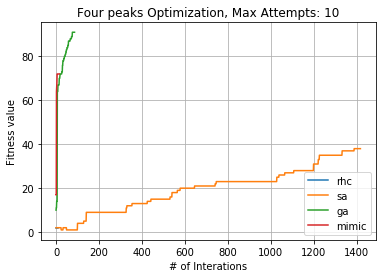

[0.0003278659996794886, 0.051424724999833415, 1.4460203620001266, 12.87144592300001]


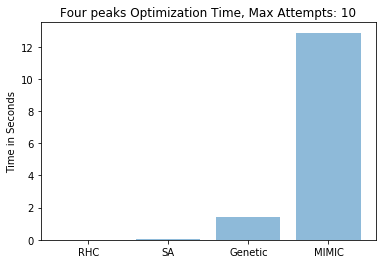

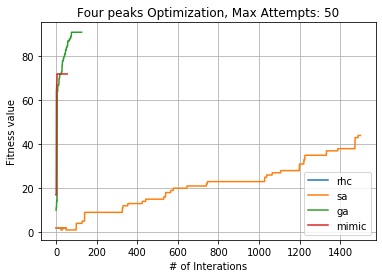

[0.000842789000216726, 0.04753942299976188, 2.0850612599997476, 44.615529071999845]


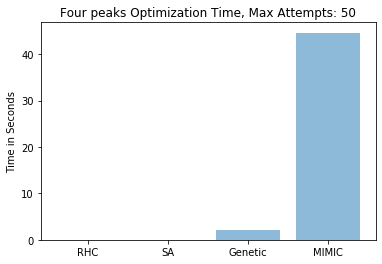

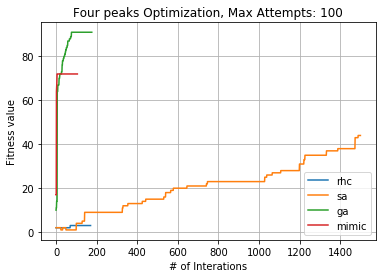

[0.0029208810001364327, 0.04915908200018748, 2.9603404149997914, 84.5445751479997]


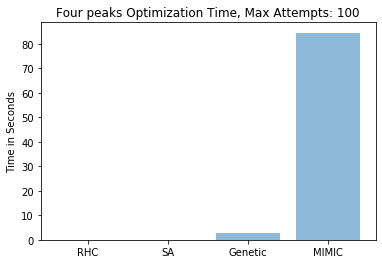

<Figure size 432x288 with 0 Axes>

In [19]:
# Fill the empty values
#for k, v in fitness_scores.items():
#    values = [v[-1]] * (max_iters - (len(v)))
#    fitness_scores[k] = np.append(v, values)
for k, v in results.items():
    plot_graph(v[0],"Four peaks Optimization, Max Attempts: {}".format(k))
    print(v[1])
    plot_bar(v[1], algorithms, "Four peaks Optimization Time, Max Attempts: {}".format(k))

## One Max optimization problem

In [20]:
max_attempts_list = [10, 50, 100]
max_iters = 1500
problem_size = 50
results = {10: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           50: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]], 
           100: [{'rhc': [],'sa': [],'ga': [],'mimic': []},[]]}
algorithms = ('RHC', 'SA', 'Genetic', 'MIMIC')

onemax_fitness = mlrose.OneMax()
onemax_problem = mlrose.DiscreteOpt(length = problem_size, fitness_fn = onemax_fitness, maximize = True)

for max_attempts in max_attempts_list:
    best_state, best_fitness, fitness_curve, time = randomized_hill_climb(onemax_problem, max_attempts, max_iters)
    results[max_attempts][0]['rhc'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = simulated_annealing(onemax_problem, max_attempts, max_iters)
    results[max_attempts][0]['sa'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = genetic(onemax_problem, max_attempts, max_iters)
    results[max_attempts][0]['ga'] = fitness_curve
    results[max_attempts][1].append(time)
    
    best_state, best_fitness, fitness_curve, time = mimic(onemax_problem, max_attempts, max_iters)
    results[max_attempts][0]['mimic'] = fitness_curve
    results[max_attempts][1].append(time)

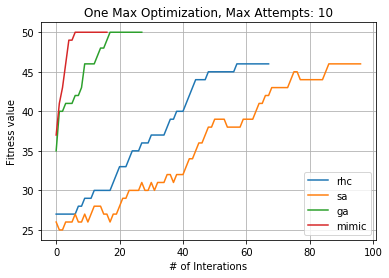

[0.001992501000131597, 0.0034580759997879795, 0.44249142599983315, 13.676748023000073]


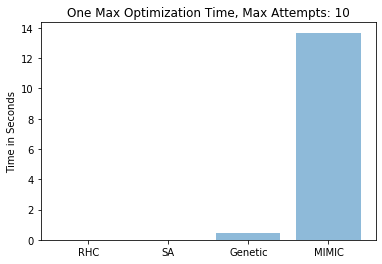

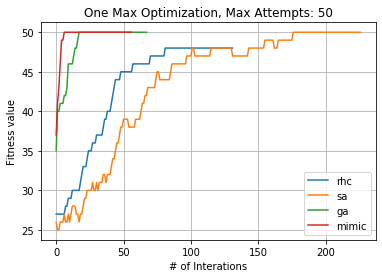

[0.0029025569997429557, 0.006659428000148182, 1.0439871070002482, 45.6174916369996]


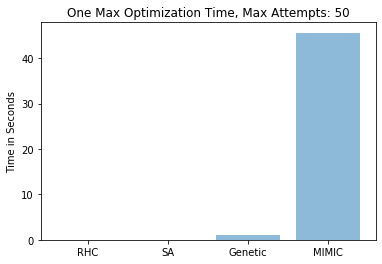

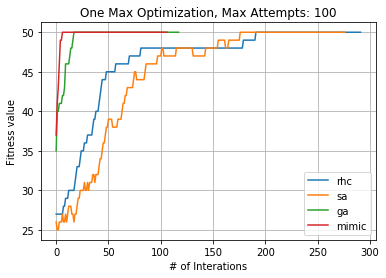

[0.00644843200007017, 0.008166691000042192, 1.8183929900001203, 83.69328105100021]


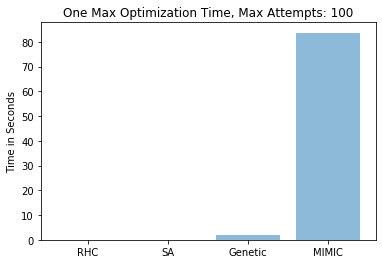

<Figure size 432x288 with 0 Axes>

In [21]:
# Fill the empty values
#for k, v in fitness_scores.items():
#    values = [v[-1]] * (max_iters - (len(v)))
#    fitness_scores[k] = np.append(v, values)
for k, v in results.items():
    plot_graph(v[0],"One Max Optimization, Max Attempts: {}".format(k))
    print(v[1])
    plot_bar(v[1], algorithms, "One Max Optimization Time, Max Attempts: {}".format(k))